# Análise de dados para uma gestora de investimentos

Você é um analista de dados de uma Gestora de Investimentos e recebeu alguns dados sobre taxa de juros, dólar e outros indicadores econômicos. Porém, o fornecedor dos dados aparentemente não é confiável, devido histórico anterior 
de problemas nos dados e vazamentos de informações. Mediante estes pontos, realize as seguintes análises:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Execute essa celula para conectar ao google drive
from google.colab import drive
drive.mount('/content/drive')

# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leia o arquivo CSV em um DataFrame
df = pd.read_csv('/content/drive/MyDrive/Portfólio/Caso_Gestora_de_Investimentos/dados.csv', sep=';', decimal=',')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,...,preco_petroleo,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,...,30.77,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,...,32.88,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,...,30.36,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070
3,4,2003,3.119,0.97,18.716,6.0,NaN,12.4,5.710,NaN,...,25.49,272.0,1.255,1.354,1.529,1.308,1.941,2.195,0.723,1.068
4,5,2003,2.956,0.61,19.654,6.1,20.6,12.8,6.372,3.854,...,26.06,284.0,1.294,1.276,1.456,1.270,1.869,2.113,0.717,1.066


**1 – Identifique quais meses e anos apresentam falta de informações e qual percentual de perda.**

In [ ]:
# Criando um dataframe com o ano, mês e numero de células com valores perdidos 
# em cada linha do dataframe original
df_missings_lin = pd.DataFrame({'ano': df['ano'].tolist(),
                                'mes': df['mes'].tolist(),
                                'n_missings': df.isna().sum(axis=1).tolist()})

# Numero de colunas no df
n_colunas = df.shape[1]-1

# Adicionando a coluna perc_missings que mostra a porcentagem de valores vazios 
# em cada linha do dataframe original
df_missings_lin['perc_missings'] = df_missings_lin['n_missings'] / n_colunas

# Visualização das informações
display(df_missings_lin)

,ano,mes,n_missings,perc_missings
0,2003,1,4,0.181818
1,2003,2,5,0.227273
2,2003,3,5,0.227273
3,2003,4,2,0.090909
4,2003,5,0,0.000000
...,...,...,...,...
145,2015,2,3,0.136364
146,2015,3,5,0.227273
147,2015,4,4,0.181818
148,2015,5,4,0.181818


In [ ]:
# Criando um novo data frame, onde estáo dispostos apenas os meses e anos que 
# apresentam perda de dados maior que 20 %
df_mlin = df_missings_lin[df_missings_lin['perc_missings'] > 0.2]
display(df_mlin)

,ano,mes,n_missings,perc_missings
1,2003,2,5,0.227273
2,2003,3,5,0.227273
6,2003,7,6,0.272727
7,2003,8,5,0.227273
9,2003,10,5,0.227273
...,...,...,...,...
137,2014,6,6,0.272727
138,2014,7,5,0.227273
141,2014,10,5,0.227273
146,2015,3,5,0.227273


**2 – Identifique quais colunas apresentam falta de informações. Existe alguma variável que seria melhor não utilizá-la nas análises?**

In [ ]:
# Criando um dataframe para armazenar as informações das colunas e do número de 
# células vazias que elas possuem
df_missings_col = pd.DataFrame( df.isna().sum(axis=0), 
                                columns=['n_missings']) \
                                .reset_index() \
                                .rename(columns={'index': 'variaveis'})

# Numero de linhas no df
n_linhas = df.shape[0]-1

# Adicionando a coluna perc_missings que mostra a porcentagem de valores vazios 
# em cada coluna do dataframe original
df_missings_col['perc_missings'] = df_missings_col['n_missings'] / n_linhas

# Visualização das informações
df_missings_col

,variaveis,n_missings,perc_missings
0,mes,0,0.000000
1,ano,0,0.000000
2,dolar,26,0.174497
3,ipca,37,0.248322
4,selic,41,0.275168
5,desemprego_usa,23,0.154362
6,desemprego_sp,23,0.154362
7,desemprego_geral,31,0.208054
8,exportacao,30,0.201342
9,importacao,33,0.221477


In [ ]:
# Criando um novo data frame apenas com as variveis (colunas) que possuem um
# percentual de células vazias menor que 20%
df_mcol = df_missings_col[df_missings_col['perc_missings'] > 0.2]
display(df_mcol)

,variaveis,n_missings,perc_missings
3,ipca,37,0.248322
4,selic,41,0.275168
7,desemprego_geral,31,0.208054
8,exportacao,30,0.201342
9,importacao,33,0.221477
10,saldo_mensal_balanca,33,0.221477
11,taxa_cobertura_balanca,34,0.228188
12,taxa_juros_eua,35,0.234899
15,consumo_derivados_petroleo_barril,33,0.221477
17,diesel_preco_medio_consumidor,30,0.201342


Teoricamente, não devemos utilizar colunas com mais de 20 % de dados perdidos, sendo essas as colunas listadas acima. Porém, adotando uma maior flexibilidade na análise, deveríamos descartar, principalmente, as colunas de IPCA e SELIC, pois apresentam porcentagens ainda maiores.

**3 – Obtenha a média, mediana e correlação entre a taxa de variação do dólar, Selic e ipca eliminando os missings e imputando zero para os missings. Existiu diferença significativa? O que você recomendaria?**

*Obs: pesquisar a função 'pd.pct_change' para auxiliar no cálculo da taxa de variação.*

In [ ]:
# Filtrando apenas as colunas que eu vou trabalhar nesse exercício
df_3 = df[['dolar', 'ipca', 'selic']]

# Removendo todas as linhas que possuem missing values
df_3_remove = df_3.dropna()

# Calculando a média
media_dolar = df_3_remove['dolar'].mean()
media_ipca = df_3_remove['ipca'].mean()
media_selic = df_3_remove['selic'].mean()

# Calculando a médiana
mediana_dolar = df_3_remove['dolar'].median()
mediana_ipca = df_3_remove['ipca'].median()
mediana_selic = df_3_remove['selic'].median()

# Calculando a taxa de variação entre dolar, ipca e selic
df_variacao_remove = df_3_remove.pct_change()

# Imprimindo as respostas
print('P/ MISSING VALUES REMOVIDOS:')
print('\n')
print("Média do dolar: {:.2f}".format(media_dolar))
print("Média do ipca:  {:.2f}".format(media_ipca))
print("Média da selic: {:.2f}".format(media_selic))
print('\n')
print("Mediana do dolar: {:.2f}".format(mediana_dolar))
print("Mediana do ipca:   {:.2f}".format(mediana_ipca))
print("Mediana da selic:  {:.2f}".format(mediana_selic))
print('\n')
print('CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC')
print(df_3_remove.corr())
print('\n')
print('CORRELAÇÃO ENTRE AS TAXAS DE VARIAÇÃO DO DOLAR, DO IPCA E DA SELIC')
print(df_variacao_remove.corr())
print('\n')
print('DATA FRAME DAS TAXAS DE VARIAÇÃO')
print(df_variacao_remove)

P/ MISSING VALUES REMOVIDOS:


Média do dolar: 2.21
Média do ipca:  0.49
Média da selic: 12.36


Mediana do dolar: 2.15
Mediana do ipca:   0.44
Mediana da selic:  9.43


CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC
          dolar      ipca     selic
dolar  1.000000  0.457753  0.175400
ipca   0.457753  1.000000  0.010353
selic  0.175400  0.010353  1.000000


CORRELAÇÃO ENTRE AS TAXAS DE VARIAÇÃO DO DOLAR, DO IPCA E DA SELIC
          dolar      ipca     selic
dolar  1.000000 -0.052349 -0.066395
ipca  -0.052349  1.000000  0.043981
selic -0.066395  0.043981  1.000000
DATA FRAME DAS TAXAS DE VARIAÇÃO
        dolar      ipca     selic
0         NaN       NaN       NaN
1    0.045124 -0.302222 -0.071476
3   -0.131198 -0.382166  0.022509
4   -0.052260 -0.371134  0.050118
5   -0.024696 -1.245902 -0.055307
..        ...       ...       ...
134 -0.024329  0.333333 -0.030629
136 -0.045142 -0.500000  0.130565
137  0.006754 -0.130435 -0.047812
143  0.182469  0.950000  0.165919
148  0.158850 -0.051282  0.02

In [ ]:
# Preencher os valores ausentes com zero
df_3_zero = df_3.fillna(0)

# Calculando a média
media_dolar = df_3_zero['dolar'].mean()
media_ipca = df_3_zero['ipca'].mean()
media_selic = df_3_zero['selic'].mean()

# Calculando a médiana
mediana_dolar = df_3_zero['dolar'].median()
mediana_ipca = df_3_zero['ipca'].median()
mediana_selic = df_3_zero['selic'].median()

# Calculando a taxa de variação entre dolar, ipca e selic
df_variacao_zero = df_3_zero.pct_change()

# Imprimindo as respostas
print('P/ MISSING VALUES = ZERO:')
print('\n')
print("Média do dolar: {:.2f}".format(media_dolar))
print("Média do ipca:  {:.2f}".format(media_ipca))
print("Média da selic: {:.2f}".format(media_selic))
print('\n')
print("Mediana do dolarm: {:.2f}".format(mediana_dolar))
print("Mediana do ipca:   {:.2f}".format(mediana_ipca))
print("Mediana da selic:  {:.2f}".format(mediana_selic))
print('\n')
print('CORRELAÇÃO ENTR DOLAR, IPCA E SELIC')
print(df_3_zero.corr())
print('\n')
print('CORRELAÇÃO ENTRE AS TAXAS DE VARIAÇÃO DO DOLAR, DO IPCA E DA SELIC')
print(df_variacao_zero.corr())
print('\n')
print('DATA FRAME DAS TAXAS DE VARIAÇÃO')
print(df_variacao_zero)

P/ MISSING VALUES = ZERO:


Média do dolar: 1.90
Média do ipca:  0.38
Média da selic: 8.46


Mediana do dolarm: 2.03
Mediana do ipca:   0.37
Mediana da selic:  8.16


CORRELAÇÃO ENTR DOLAR, IPCA E SELIC
          dolar      ipca     selic
dolar  1.000000  0.088109  0.081446
ipca   0.088109  1.000000 -0.003397
selic  0.081446 -0.003397  1.000000


CORRELAÇÃO ENTRE AS TAXAS DE VARIAÇÃO DO DOLAR, DO IPCA E DA SELIC
          dolar      ipca     selic
dolar  1.000000 -0.037103  0.024496
ipca  -0.037103  1.000000  0.111310
selic  0.024496  0.111310  1.000000


DATA FRAME DAS TAXAS DE VARIAÇÃO
        dolar      ipca     selic
0         NaN       NaN       NaN
1    0.045124 -0.302222 -0.071476
2   -0.040111 -0.216561 -1.000000
3   -0.094893 -0.211382       inf
4   -0.052260 -0.371134  0.050118
..        ...       ...       ...
145  0.067854       inf -1.000000
146  0.114661 -1.000000       inf
147 -0.030573       inf -1.000000
148  0.006570  0.042254       inf
149  0.015339  0.067568 -1.0000

In [ ]:
print('CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC - REMOVE')
print(df_3_remove.corr())
print('\n')
print('CORRELAÇÃO ENTR DOLAR, IPCA E SELIC - ZERO')
print(df_3_zero.corr())

CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC - REMOVE
          dolar      ipca     selic
dolar  1.000000  0.457753  0.175400
ipca   0.457753  1.000000  0.010353
selic  0.175400  0.010353  1.000000


CORRELAÇÃO ENTR DOLAR, IPCA E SELIC - ZERO
          dolar      ipca     selic
dolar  1.000000  0.088109  0.081446
ipca   0.088109  1.000000 -0.003397
selic  0.081446 -0.003397  1.000000


Analisando as correlações entre as variáveis em estudo, a partir do input de "0" para os valores perdidos e da exclusão das linhas com informações faltantes, nota-se que a correlação entre dolar e IPCA são próximas, enquanto as correlações entre dolar e SELIC e IPCA e SELIC apresentam valores bem distintos para as duas técnicas.
Dentre as duas técnicas, a de remoção trouxe melhores resultados.

**4 – Aplique a média e mediana para imputar valores aos missings de dólar, Selic e ipca. Obtenha as correlações entre 
estas variáveis. Os valores apresentaram diferença em relação as análises anteriores?**

In [ ]:
# Encontrando a média das colunas do data frame original
media_dolar = df['dolar'].mean()
media_ipca = df['ipca'].mean()
media_selic = df['selic'].mean()

# Criando um dataframe que substitui os missing values pela média calculada de df
df_4_media = df_3 \
    .assign(dolar = df['dolar'].fillna(media_dolar) ) \
    .assign(ipca = df['ipca'].fillna(media_ipca) ) \
    .assign(selic = df['selic'].fillna(media_selic) )

# Imprimindo as respostas
print('P/ MISSING VALUES = MÉDIA')
print('\n')
print("Média do dolar: ", media_dolar)
print("Média do ipca:  ", media_ipca)
print("Média da selic: ", media_selic)
print('\n')
print('CORRELAÇÃO ENTR DOLAR, IPCA E SELIC')
print(df_4_media.corr())
print('\n')
print('DATA FRAME')
print(df_4_media)


P/ MISSING VALUES = MÉDIA


Média do dolar:  2.3037983870967746
Média do ipca:   0.5007079646017699
Média da selic:  11.639330275229357


CORRELAÇÃO ENTR DOLAR, IPCA E SELIC
          dolar      ipca     selic
dolar  1.000000  0.221510  0.069572
ipca   0.221510  1.000000  0.007356
selic  0.069572  0.007356  1.000000


DATA FRAME
     dolar      ipca     selic
0    3.435  2.250000  19.71300
1    3.590  1.570000  18.30400
2    3.446  1.230000  11.63933
3    3.119  0.970000  18.71600
4    2.956  0.610000  19.65400
..     ...       ...       ...
145  2.817  1.220000  11.63933
146  3.140  0.500708  10.40000
147  3.044  0.710000  11.63933
148  3.064  0.740000   9.85300
149  3.111  0.790000  11.63933

[150 rows x 3 columns]


In [ ]:
# Encontrando a mediana das colunas do data frame original
mediana_dolar = df['dolar'].median()
mediana_ipca = df['ipca'].median()
mediana_selic = df['selic'].median()

# Criando um dataframe que substitui os missing values pela médiana calculada de df
df_4_mediana = df_3 \
    .assign(dolar = df['dolar'].fillna(mediana_dolar) ) \
    .assign(ipca = df['ipca'].fillna(mediana_ipca) ) \
    .assign(selic = df['selic'].fillna(mediana_selic) )

# Imprimindo as respostas
print('P/ MISSING VALUES = MEDIANA')
print("Médiana do dolar: ", mediana_dolar)
print("Médiana do ipca:  ", mediana_ipca)
print("Médiana da selic: ", mediana_selic)
print('\n')
print('CORRELAÇÃO ENTR DOLAR, IPCA E SELIC (MISSING VALUES = MEDIANA)')
print(df_4_mediana.corr())
print('\n')
print('DATA FRAME')
print(df_4_mediana)


P/ MISSING VALUES = MEDIANA
Médiana do dolar:  2.1675
Médiana do ipca:   0.47
Médiana da selic:  9.448


CORRELAÇÃO ENTR DOLAR, IPCA E SELIC (MISSING VALUES = MEDIANA)
          dolar      ipca     selic
dolar  1.000000  0.218214  0.072997
ipca   0.218214  1.000000  0.003382
selic  0.072997  0.003382  1.000000


DATA FRAME
     dolar  ipca   selic
0    3.435  2.25  19.713
1    3.590  1.57  18.304
2    3.446  1.23   9.448
3    3.119  0.97  18.716
4    2.956  0.61  19.654
..     ...   ...     ...
145  2.817  1.22   9.448
146  3.140  0.47  10.400
147  3.044  0.71   9.448
148  3.064  0.74   9.853
149  3.111  0.79   9.448

[150 rows x 3 columns]


In [ ]:
print('CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC - REMOVE')
print(df_3_remove.corr())
print('\n')
print('CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC - ZERO')
print(df_3_zero.corr())
print('\n')
print('CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC - MÉDIA')
print(df_4_media.corr())
print('\n')
print('CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC (MISSING VALUES = MEDIANA)')
print(df_4_mediana.corr())

CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC - REMOVE
          dolar      ipca     selic
dolar  1.000000  0.457753  0.175400
ipca   0.457753  1.000000  0.010353
selic  0.175400  0.010353  1.000000


CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC - ZERO
          dolar      ipca     selic
dolar  1.000000  0.088109  0.081446
ipca   0.088109  1.000000 -0.003397
selic  0.081446 -0.003397  1.000000


CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC - MÉDIA
          dolar      ipca     selic
dolar  1.000000  0.221510  0.069572
ipca   0.221510  1.000000  0.007356
selic  0.069572  0.007356  1.000000


CORRELAÇÃO ENTRE DOLAR, IPCA E SELIC (MISSING VALUES = MEDIANA)
          dolar      ipca     selic
dolar  1.000000  0.218214  0.072997
ipca   0.218214  1.000000  0.003382
selic  0.072997  0.003382  1.000000


A utilização dos valores de média e mediana para o substituição dos valores perdidos geraram resultados semelhantes, segundo a análise de correlação. Comparando com os métodos anteriores, a exclusão das linhas com informações faltantes ainda é o método que trouxe melhor resultado para as correlações entre as variáveis.

**5 – Realizar a transformação z-score em todas as variáveis. Indique quais variáveis e quais meses foram encontrados 
valores acima de 3 ou abaixo de -3.**

In [ ]:
# Calculando o z-score para todas as variáveis de df
df_zscore = df.apply(lambda x: (x - x.mean()) / x.std())

# Identifique os valores acima de 3 ou abaixo de -3 em cada variável:
df_outliers = df_zscore[(df_zscore > 3) | (df_zscore < -3)]

# Remover linhas que não possuem valores
df_outliers.dropna(axis=0, how='all', inplace=True)

# Remover colunas que não possuem valores
df_outliers.dropna(axis=1, how='all', inplace=True)

# Puxar as colunas 'mes' e 'ano' do DataFrame original 'df'
df_outliers[['mes', 'ano']] = df[['mes', 'ano']].loc[df_outliers.index]

# Visualização
df_outliers

,dolar,ipca,selic,desemprego_usa,desemprego_sp,exportacao,importacao,saldo_mensal_balanca,consumo_gasolina_m3,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,mes,ano
0,NaN,5.437424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2003
1,NaN,3.323741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2003
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.8741,NaN,NaN,9,2003
11,NaN,NaN,NaN,3.445634,NaN,NaN,NaN,NaN,NaN,4.64261,4.295459,12,2003
32,NaN,NaN,9.980982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2005
51,NaN,NaN,NaN,NaN,NaN,NaN,4.534625,NaN,NaN,NaN,NaN,4,2007
64,NaN,NaN,NaN,NaN,NaN,10.320666,NaN,NaN,NaN,NaN,NaN,5,2008
79,NaN,NaN,NaN,NaN,NaN,NaN,8.700037,NaN,NaN,NaN,NaN,8,2009
82,NaN,NaN,NaN,NaN,10.479515,NaN,NaN,NaN,NaN,NaN,NaN,11,2009
132,9.073931,NaN,NaN,NaN,NaN,NaN,NaN,-3.490519,NaN,NaN,NaN,1,2014


**6 – Gere os seguintes box-plot e identifique se existe alguma observação como possível outlier.**
*   variação do dólar
*   selic
*   consumo de gasolina

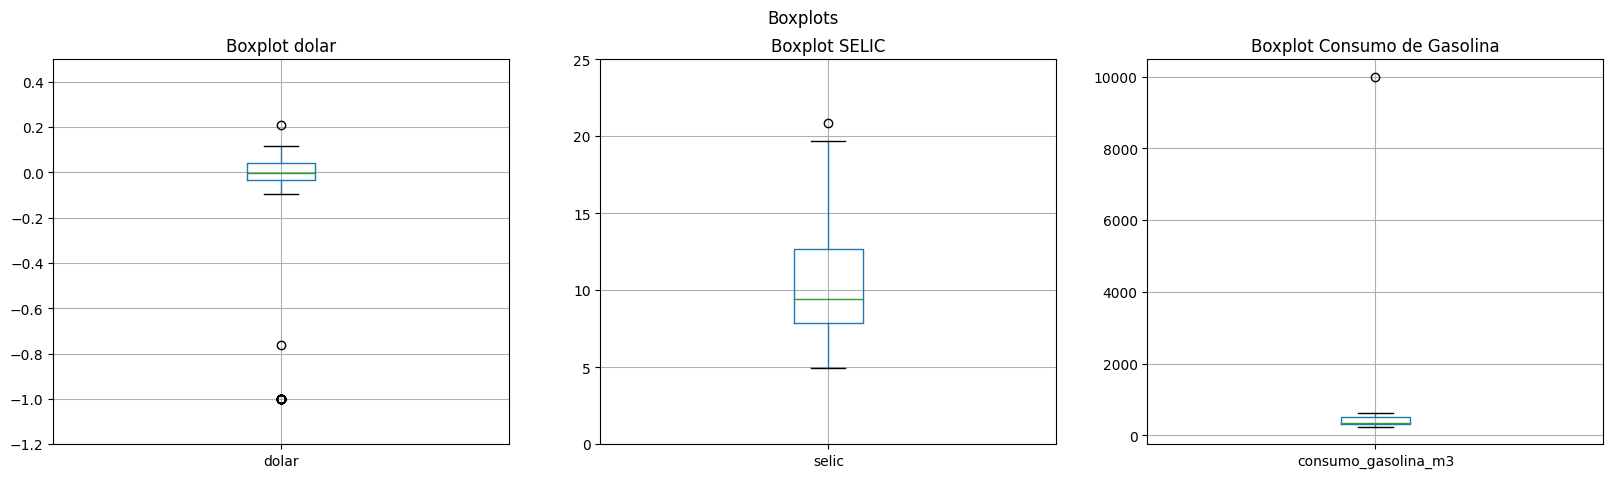

In [ ]:
# Gerando os gráficos
figura = plt.figure(figsize=(20, 5))
figura.suptitle('Boxplots')

figura.add_subplot(131)
df_variacao[['dolar']].boxplot()
plt.ylim(-1.2, 0.5)
plt.title('Boxplot dolar')

figura.add_subplot(132)
df[['selic']].boxplot()
plt.ylim(0, 25)
plt.title('Boxplot SELIC')

figura.add_subplot(133)
df[['consumo_gasolina_m3']].boxplot()
plt.title('Boxplot Consumo de Gasolina')

plt.show()

Existem outliers para as 3 variáveis analisadas.

**7 – Gere os seguintes gráficos de dispersão e identifique se existe alguma observação como possível outlier.**
*   variação do dólar x selic
*   ipca x selic
*   preço petróleo x consumo de gasolina

In [ ]:
# Criando um DataFrame de variação a partir do df_3
df_variacao = df_3.pct_change()
df_variacao = df_variacao.rename(columns = {'dolar' : 'variacao dolar'})
df = df.merge(df_variacao[['variacao dolar']], left_index=True, right_index=True)
df

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,...,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor,variacao dolar
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,...,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029,NaN
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,...,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071,0.045124
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,...,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070,-0.040111
3,4,2003,3.119,0.97,18.716,6.0,NaN,12.4,5.710,NaN,...,272.0,1.255,1.354,1.529,1.308,1.941,2.195,0.723,1.068,-0.094893
4,5,2003,2.956,0.61,19.654,6.1,20.6,12.8,6.372,3.854,...,284.0,1.294,1.276,1.456,1.270,1.869,2.113,0.717,1.066,-0.052260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,2015,2.817,1.22,NaN,5.5,10.5,5.9,12.092,14.934,...,524.0,1.896,2.414,2.788,NaN,NaN,3.301,1.450,1.944,0.067854
146,3,2015,3.140,NaN,10.400,5.5,11.4,NaN,16.979,NaN,...,511.0,1.980,NaN,2.810,NaN,2.875,3.323,1.456,1.955,0.114661
147,4,2015,3.044,0.71,NaN,5.4,12.4,6.4,15.156,14.665,...,527.0,1.955,NaN,2.809,1.788,2.873,3.308,1.470,1.986,-0.030573
148,5,2015,3.064,0.74,9.853,5.5,12.9,6.7,16.769,14.008,...,485.0,NaN,2.482,2.808,1.771,2.867,3.299,NaN,NaN,0.006570


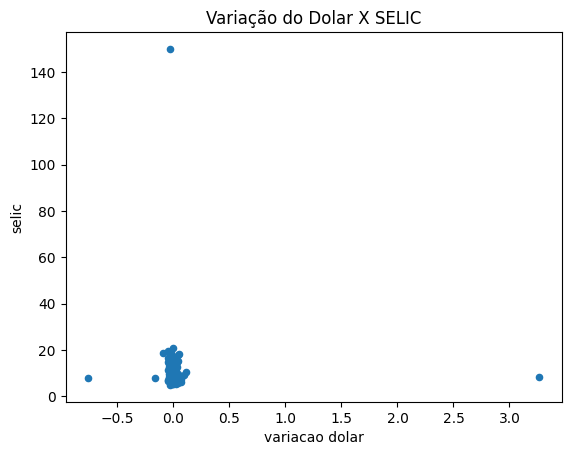

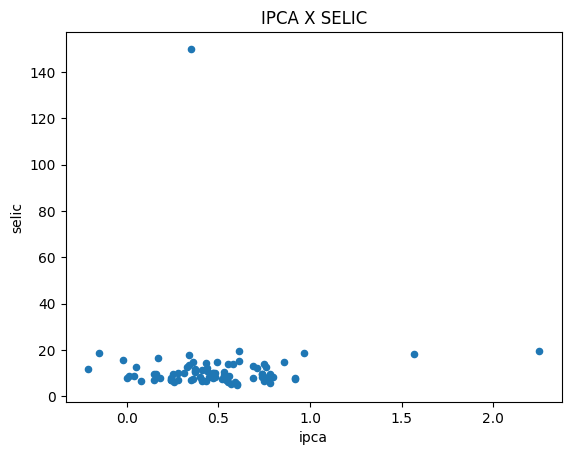

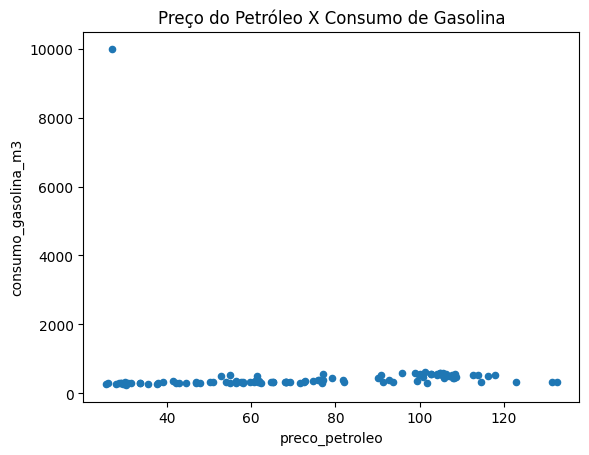

In [ ]:
# Gerando os gráficos
figura2.add_subplot(131)
df.plot.scatter(x = 'variacao dolar', y = 'selic')
plt.title('Variação do Dolar X SELIC')

figura2.add_subplot(132)
df.plot.scatter(x = 'ipca', y = 'selic')
plt.title('IPCA X SELIC')

figura2.add_subplot(133)
df.plot.scatter(x = 'preco_petroleo', y = 'consumo_gasolina_m3')
plt.title('Preço do Petróleo X Consumo de Gasolina')


plt.show()

Assim como no item anterior, também é possível observar outliers nas 3 análises.

**8 – Calcular o D2 de Mahalanobis utilizando as variáveis desemprego USA, desemprego SP e desemprego geral. Existe 
alguma observação candidata a outlier?**


In [ ]:
from scipy.spatial import distance

# Selecionar as colunas desejadas para o cálculo da distância
columns = ['desemprego_usa', 'desemprego_sp', 'desemprego_geral']

# Calcular a matriz de covariância das colunas selecionadas
covariance_matrix = df[columns].cov()

# Calcular a matriz de covariância inversa
inv_covariance_matrix = np.linalg.inv(covariance_matrix)

# Calcular a média das colunas selecionadas
mean = df[columns].mean()

# Calcular as distâncias de Mahalanobis para cada linha do DataFrame
distances = distance.cdist(df[columns], [mean], metric='mahalanobis', VI=inv_covariance_matrix)
df['mahalanobis_d'] = distances

# Exibir o DataFrame com a nova coluna
display(df)

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,...,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor,mahalanobis_d
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,...,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029,NaN
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,...,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071,1.553946
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,...,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070,1.780168
3,4,2003,3.119,0.97,18.716,6.0,NaN,12.4,5.710,NaN,...,272.0,1.255,1.354,1.529,1.308,1.941,2.195,0.723,1.068,NaN
4,5,2003,2.956,0.61,19.654,6.1,20.6,12.8,6.372,3.854,...,284.0,1.294,1.276,1.456,1.270,1.869,2.113,0.717,1.066,2.156099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,2015,2.817,1.22,NaN,5.5,10.5,5.9,12.092,14.934,...,524.0,1.896,2.414,2.788,NaN,NaN,3.301,1.450,1.944,1.448697
146,3,2015,3.140,NaN,10.400,5.5,11.4,NaN,16.979,NaN,...,511.0,1.980,NaN,2.810,NaN,2.875,3.323,1.456,1.955,NaN
147,4,2015,3.044,0.71,NaN,5.4,12.4,6.4,15.156,14.665,...,527.0,1.955,NaN,2.809,1.788,2.873,3.308,1.470,1.986,1.303573
148,5,2015,3.064,0.74,9.853,5.5,12.9,6.7,16.769,14.008,...,485.0,NaN,2.482,2.808,1.771,2.867,3.299,NaN,NaN,1.132089


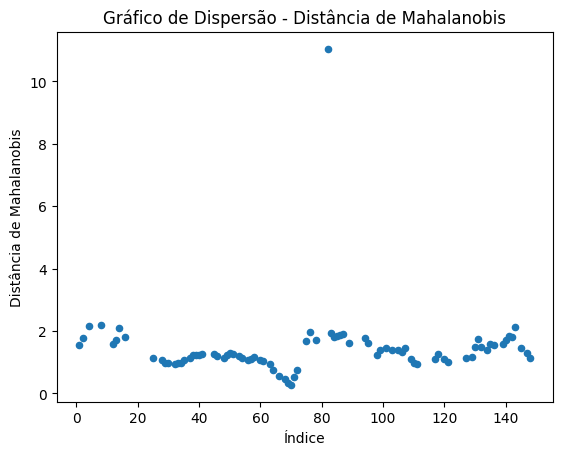

In [ ]:
# Redefinir o índice do DataFrame
df_reset = df.reset_index()

# Criar o gráfico de dispersão
df_reset.plot.scatter(x='index', y='mahalanobis_d')
plt.xlabel('Índice')
plt.ylabel('Distância de Mahalanobis')
plt.title('Gráfico de Dispersão - Distância de Mahalanobis')
plt.show()

Por este método, também é possível constatar a presença de outliers nas amostras.

**9 – Criar faixas pelos quartis para as seguintes variáveis:**
*   Desemprego USA
*   Desemprego SP
*   Desemprego Geral

In [ ]:
# Criando a coluna de Desemprego USA categorizada
df['desemprego_usa_cat'] = pd.qcut(df['desemprego_usa'], q = 4, 
                                   labels = ['baixo', 'baixo-medio', 
                                             'medio-alto', 'alto'])

# Criando a coluna de Desemprego SP categorizada
df['desemprego_sp_cat'] = pd.qcut(df['desemprego_sp'], q = 4, 
                                   labels = ['baixo', 'baixo-medio', 
                                             'medio-alto', 'alto'])

# Criando a coluna de Desemprego Geral categorizada
df['desemprego_geral_cat'] = pd.qcut(df['desemprego_geral'], q = 4, 
                                   labels = ['baixo', 'baixo-medio', 
                                             'medio-alto', 'alto'])

# Visualização das novas colunas
display(df[['mes', 'ano', 'desemprego_usa_cat', 'desemprego_sp_cat', 'desemprego_geral_cat']])

,mes,ano,desemprego_usa_cat,desemprego_sp_cat,desemprego_geral_cat
0,1,2003,NaN,alto,alto
1,2,2003,baixo-medio,alto,alto
2,3,2003,baixo-medio,alto,alto
3,4,2003,baixo-medio,NaN,alto
4,5,2003,baixo-medio,alto,alto
...,...,...,...,...,...
145,2,2015,baixo-medio,baixo,baixo-medio
146,3,2015,baixo-medio,baixo-medio,NaN
147,4,2015,baixo-medio,baixo-medio,baixo-medio
148,5,2015,baixo-medio,baixo-medio,baixo-medio


10 – Aplicar a winsorização para as seguintes variáveis:
*   Consumo derivados petróleo
*   Importação
*   Consumo gasolina

In [ ]:
# Verificando os valores para o quartis 1% e 90% da variável Consumo Derivados
# Petróleo
df['importacao'].quantile([0.01, 0.9])

# Guardando valores
wins_values = df['importacao'].quantile([0.01, 0.9]) \
.to_list()
np.round(wins_values, 2)
df['importacao_wins'] = df['importacao'] \
                                                .clip(wins_values[0], wins_values[1])

display(df[['mes', 'ano', 'importacao', 
            'importacao_wins']])

,mes,ano,importacao,importacao_wins
0,1,2003,NaN,NaN
1,2,2003,NaN,NaN
2,3,2003,NaN,NaN
3,4,2003,NaN,NaN
4,5,2003,3.854,3.854
...,...,...,...,...
145,2,2015,14.934,14.934
146,3,2015,NaN,NaN
147,4,2015,14.665,14.665
148,5,2015,14.008,14.008


In [ ]:
# Verificando os valores para o quartis 1% e 90% da variável Consumo Derivados
# Petróleo
df['consumo_derivados_petroleo_barril'].quantile([0.01, 0.9])

# Guardando valores
wins_values = df['consumo_derivados_petroleo_barril'].quantile([0.01, 0.9]) \
.to_list()
np.round(wins_values, 2)
df['consumo_derivados_petroleo_barril_wins'] = df['consumo_derivados_petroleo_barril'] \
                                                .clip(wins_values[0], wins_values[1])

display(df[['mes', 'ano', 'consumo_derivados_petroleo_barril', 
            'consumo_derivados_petroleo_barril_wins']])

,mes,ano,consumo_derivados_petroleo_barril,consumo_derivados_petroleo_barril_wins
0,1,2003,1.205,1.205
1,2,2003,1.272,1.272
2,3,2003,NaN,NaN
3,4,2003,1.255,1.255
4,5,2003,1.294,1.294
...,...,...,...,...
145,2,2015,1.896,1.896
146,3,2015,1.980,1.980
147,4,2015,1.955,1.955
148,5,2015,NaN,NaN


In [ ]:
# Verificando os valores para o quartis 1% e 90% da variável Consumo Derivados
# Petróleo
df['consumo_gasolina_m3'].quantile([0.01, 0.9])

# Guardando valores
wins_values = df['consumo_gasolina_m3'].quantile([0.01, 0.9]) \
.to_list()
np.round(wins_values, 2)
df['consumo_gasolina_m3_wins'] = df['consumo_gasolina_m3'] \
                                                .clip(wins_values[0], wins_values[1])

display(df[['mes', 'ano', 'consumo_gasolina_m3', 
            'consumo_gasolina_m3_wins']])

,mes,ano,consumo_gasolina_m3,consumo_gasolina_m3_wins
0,1,2003,282.0,282.00
1,2,2003,NaN,NaN
2,3,2003,243.0,266.47
3,4,2003,272.0,272.00
4,5,2003,284.0,284.00
...,...,...,...,...
145,2,2015,524.0,524.00
146,3,2015,511.0,511.00
147,4,2015,527.0,527.00
148,5,2015,485.0,485.00


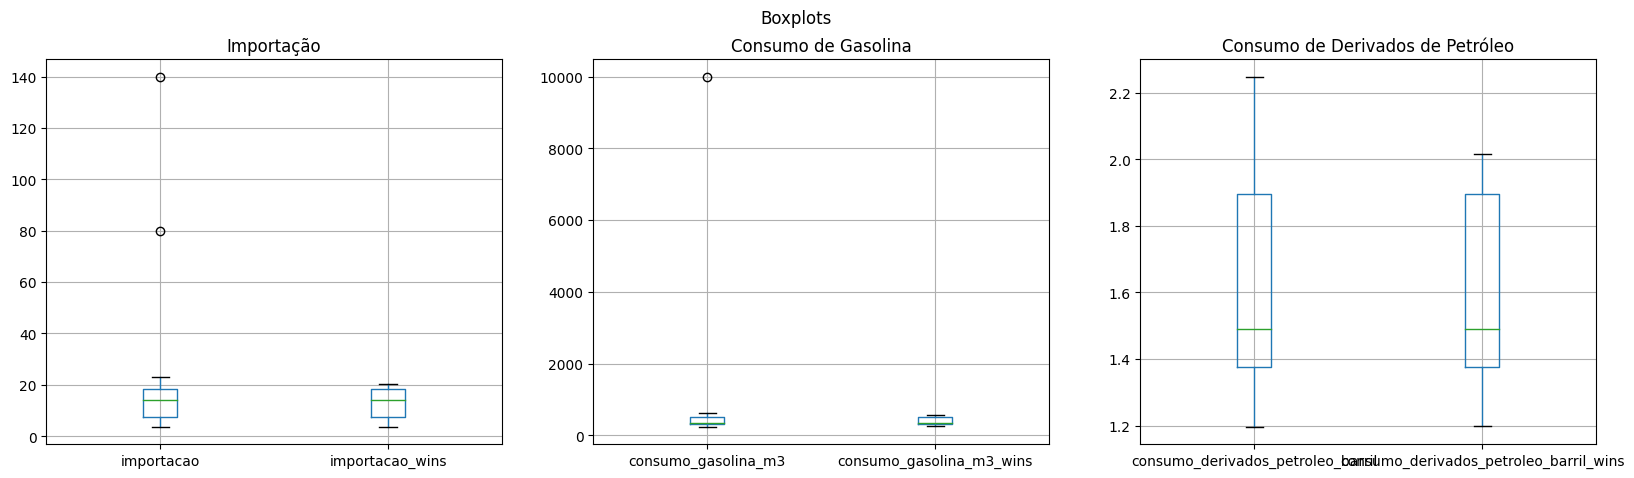

In [ ]:
# Visualizando a partir do boxplot

plt.show()

# Gerando os gráficos
figura = plt.figure(figsize=(20, 5))
figura.suptitle('Boxplots')

figura.add_subplot(131)
df[['importacao', 'importacao_wins']].boxplot()
plt.title('Importação')


figura.add_subplot(132)
df[['consumo_gasolina_m3', 'consumo_gasolina_m3_wins']].boxplot()
plt.title('Consumo de Gasolina')

figura.add_subplot(133)
df[['consumo_derivados_petroleo_barril', 'consumo_derivados_petroleo_barril_wins']].boxplot()
plt.title('Consumo de Derivados de Petróleo')

plt.show()

Com a aplicação da Winsorização foi possível remover alguns outliers que estavam presentes nas variáveis de importaçao de consumo de derivados de petróleo.